<a href="https://colab.research.google.com/github/pvh95/Temalabor2/blob/main/toyBootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np 
import random 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

from collections import defaultdict
from copy import deepcopy as dcp 
np.set_printoptions(precision=6)

In [2]:
#Parameters
mu = 1.2  # population mean 
sigma = 0.5 # population standard deviation 

In [3]:
reps = 10000 # number of bootstrap repetitions 
#n = 50 # 'master' sample size 
#b = 50 # size of each bootstrap sample

n = 1000 # 'master' sample size 
b = 1000 # size of each bootstrap sample

In [4]:
# Generate 'master' sample

np.random.seed(42)
sample = mu + sigma*np.random.randn(n)
xbar   = np.mean(sample)    # sample mean
s2     = np.std(sample)**2  # uncorrected sample variance

# Bootstrapping
allxbar  = np.zeros((reps, 1))       # this is to store the estimated xbar-s
alls2    = np.zeros((reps, 1))       # to store the estimated s2-s
np.random.seed(43)
u = np.random.random((b,reps))
r=0

(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([-0.420634, -0.065934,  0.288766,  0.643466,  0.998166,  1.352866,
         1.707566,  2.062266,  2.416966,  2.771666,  3.126366]),
 <a list of 10 Patch objects>)

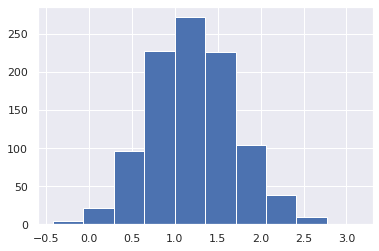

In [5]:
plt.hist(sample)

In [6]:
while r < reps:
    #generate the bootstrap sample
    
    indices = np.floor(u[: ,r]*n).astype(int) # (b x 1) vector of integers between 1 and n:
        #these are the indices of master sample elements selected into the
        #bootstrap sample
    bsample = sample[indices]
    allxbar[r] = np.mean(bsample)
    alls2[r] = np.std(bsample)**2
    r = r + 1

In [7]:
print('Theoretical Facts')
t1 = PrettyTable(['Statistics', 'Value'])
t1.add_row(['xbar', f'{mu:.6f}'])
t1.add_row(['s-sqd', f'{(sigma**2):.6f}'])
print(t1)

Theoretical Facts
+------------+----------+
| Statistics |  Value   |
+------------+----------+
|    xbar    | 1.200000 |
|   s-sqd    | 0.250000 |
+------------+----------+


In [8]:
print('Theoretical Results')
t1 = PrettyTable(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE'])
t1.add_row(['xbar', f'{mu:.6f}', f'{0:.6f}', f'{((sigma**2)/b):.6f}', f'{((sigma**2)/b):.6f}'])
t1.add_row(['s-sqd', f'{(((b-1)/b)*sigma**2):.6f}', f'{((sigma**2)/b):.6f}',
            f'{(2*(sigma**4)/(b-1)):.6f}', f'{((2*b-1)*(sigma**4)/(b**2)):.6f}' ])
print(t1)

Theoretical Results
+-----------+----------+----------+----------+----------+
| Estimator |   Mean   |   Bias   | Variance |   MSE    |
+-----------+----------+----------+----------+----------+
|    xbar   | 1.200000 | 0.000000 | 0.000250 | 0.000250 |
|   s-sqd   | 0.249750 | 0.000250 | 0.000125 | 0.000125 |
+-----------+----------+----------+----------+----------+


In [9]:
print('Sample Facts')
t2 = PrettyTable(['Statistics', 'Value'])
t2.add_row(['xbar', f'{xbar:.6f}'])
t2.add_row(['s-sqd', f'{s2:.6f}'])

print(t2)

Sample Facts
+------------+----------+
| Statistics |  Value   |
+------------+----------+
|    xbar    | 1.209666 |
|   s-sqd    | 0.239476 |
+------------+----------+


In [10]:
print('Theoretical results based on the sample')
t3 = PrettyTable(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE'])
t3.add_row(['xbar', f'{xbar:.6f}', f'{0:.6f}', f'{s2/b:.6f}', f'{s2/b:.6f}'])
t3.add_row(['s-sqd', f'{(((b-1)/b)*s2):.6f}', f'{s2/b:.6f}', f'{(2*(s2**2)/(b-1)):.6f}', f'{((2*b-1)*(s2**2)/(b**2)):.6f}'])

print(t3)


Theoretical results based on the sample
+-----------+----------+----------+----------+----------+
| Estimator |   Mean   |   Bias   | Variance |   MSE    |
+-----------+----------+----------+----------+----------+
|    xbar   | 1.209666 | 0.000000 | 0.000239 | 0.000239 |
|   s-sqd   | 0.239237 | 0.000239 | 0.000115 | 0.000115 |
+-----------+----------+----------+----------+----------+


In [11]:
print('Bootstrap results,', f'reps = {reps}')
t4 = PrettyTable(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE'])
t4.add_row(['xbar', f'{np.mean(allxbar):.6f}', f'{np.abs(xbar-np.mean(allxbar)):.6f}', 
            f'{np.std(allxbar)**2:.6f}', f'{np.mean((allxbar-xbar)**2):.6f}'])
            
t4.add_row(['s-sqd', f'{np.mean(alls2):.6f}', f'{np.abs(s2-np.mean(alls2)):.6f}', 
            f'{np.std(alls2)**2:.6f}', f'{np.mean((alls2-s2)**2):.6f}'])

print(t4)

Bootstrap results, reps = 10000
+-----------+----------+----------+----------+----------+
| Estimator |   Mean   |   Bias   | Variance |   MSE    |
+-----------+----------+----------+----------+----------+
|    xbar   | 1.209715 | 0.000049 | 0.000238 | 0.000238 |
|   s-sqd   | 0.239140 | 0.000336 | 0.000117 | 0.000117 |
+-----------+----------+----------+----------+----------+


In [12]:
boot_means = np.mean(allxbar)# bootstrapped sample means
print(boot_means)

boot_std = np.std(allxbar) # bootstrapped std
print(boot_std)

print(np.percentile(allxbar, [2.5,97.5]))# 95% C.I.

1.2097145499315978
0.015437690713716404
[1.179288 1.239743]


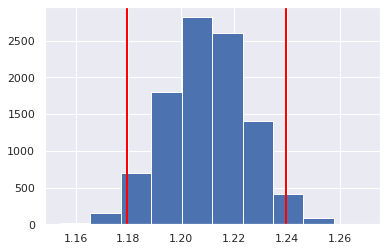

In [13]:
plt.hist(allxbar, alpha = 1)
plt.axvline(np.percentile(allxbar,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(allxbar,97.5),color = 'red',linewidth=2)

In [14]:
boot_alls2_means = np.mean(alls2)# bootstrapped sample means
print(boot_alls2_means)

boot_alls2_std = np.std(alls2) # bootstrapped std
print(boot_alls2_std)

print(np.percentile(alls2, [2.5,97.5]))# 95% C.I.

0.2391397855415631
0.010797268609715239
[0.218675 0.26108 ]


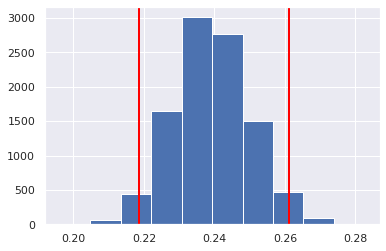

In [15]:
plt.hist(alls2, alpha = 1)
plt.axvline(np.percentile(alls2,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(alls2,97.5),color = 'red',linewidth=2)

In [16]:
np.percentile(alls2, [2.5,97.5])[0]

0.21867510005605253

In [17]:
np.percentile(alls2,2.5)

0.21867510005605253

# Generating multiple samples and bootstrap repetitions:


In [177]:
#Parameters
mu = 1.2  # population mean 
sigma = 0.5 # population standard deviation 

In [178]:
sample_size_lst = [10, 50, 100, 200, 500, 1000, 2000, 3500, 5000, 6500, 8000, 10000]
reps_lst = [10, 100, 1000, 10000]
estimator_lst = ['xbar', 's-sqd']
tables_lst=['sf', 'tr', 'trbs', 'bs']

In [179]:
def create_empty_df(column_names):
    df = pd.DataFrame(columns = column_names)
    
    return df 

In [180]:
sample_dict = dict()
#bootstrap_sample_dict = defaultdict(dict)
bootstrap_sample_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

for ss in sample_size_lst: 
    sample_dict[ss] = None

for ss in sample_size_lst: 
    for reps in reps_lst:
        for estim in estimator_lst:
            bootstrap_sample_dict[ss][reps][estim] = None




In [181]:
bootstrap_sample_dict

defaultdict(<function __main__.<lambda>>,
            {10: defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {10: defaultdict(dict, {'s-sqd': None, 'xbar': None}),
                          100: defaultdict(dict,
                                      {'s-sqd': None, 'xbar': None}),
                          1000: defaultdict(dict,
                                      {'s-sqd': None, 'xbar': None}),
                          10000: defaultdict(dict,
                                      {'s-sqd': None, 'xbar': None})}),
             50: defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {10: defaultdict(dict, {'s-sqd': None, 'xbar': None}),
                          100: defaultdict(dict,
                                      {'s-sqd': None, 'xbar': None}),
                          1000: defaultdict(dict,
                                      {'s-sqd': None, 'xbar': None}),
                          10000: defaultdic

In [182]:
### With confidence interval

encompassing_df = None

for ss in sample_size_lst:
    np.random.seed(20)
    sample = mu + sigma * np.random.randn(ss)
    xbar = np.mean(sample)    # sample mean
    #print('xbar:', xbar)
    s2 = np.std(sample)**2  # uncorrected sample variance
    #print('s2:', s2)
    sample_dict[ss] = sample
    sf_flag = True
    tr_flag = True
    trbs_flag = True
    for reps in reps_lst:
        allxbar  = np.zeros((reps, 1))
        alls2    = np.zeros((reps, 1))
        np.random.seed(12)
        u = np.random.random((ss,reps))
        r = 0
        while r < reps:
            indices = np.floor(u[: ,r]*ss).astype(int) # (b x 1) vector of integers between 1 and n:
        #these are the indices of master sample elements selected into the
        #bootstrap sample
            bsample = sample[indices]
            allxbar[r] = np.mean(bsample)
            alls2[r] = np.std(bsample)**2
            r = r + 1

        bootstrap_sample_dict[ss][reps]['xbar'] = allxbar
        bootstrap_sample_dict[ss][reps]['s-sqd'] = alls2
         
        for tab in tables_lst:
            b = ss
                
            if tab == 'tr' and tr_flag:
                tr_df = create_empty_df(['Result_Type', 'Sample_Size','Bs_Resample', 'Sample_Facts', 'Estimator', 'Mean', '0.025', '0.975', 'diff_0.95', 'Bias', 'Variance', 'RMSE'])
                tr_df['Result_Type'] = [tab, tab]
                tr_df['Sample_Size'] = [b, b]
                tr_df['Bs_Resample'] = [np.nan, np.nan]
                tr_df['Sample_Facts'] = [xbar, s2]
                tr_df['Estimator'] = ['xbar', 's-sqd']
                tr_df['Mean'] = [mu, (((b-1)/b)*sigma**2)]
                tr_df['0.025'] = [np.nan, np.nan]
                tr_df['0.975'] = [np.nan, np.nan]
                tr_df['diff_0.95'] = [np.nan, np.nan]
                tr_df['Bias'] = [0, ((sigma**2)/b)]
                tr_df['Variance'] = [((sigma**2)/b), (2*(sigma**4)/(b-1))]
                tr_df['RMSE'] = [np.sqrt(((sigma**2)/b)), np.sqrt(((2*b-1)*(sigma**4)/(b**2)))]

                tr_flag = False
                encompassing_df = pd.concat([encompassing_df, tr_df])
                
            
            elif tab == 'trbs' and trbs_flag:
                trbs_df = create_empty_df(['Result_Type', 'Sample_Size','Bs_Resample', 'Sample_Facts', 'Estimator', 'Mean', '0.025', '0.975', 'diff_0.95', 'Bias', 'Variance', 'RMSE'])
                trbs_df['Result_Type'] = [tab, tab]
                trbs_df['Sample_Size'] = [b, b]
                trbs_df['Bs_Resample'] = [np.nan, np.nan]
                trbs_df['Sample_Facts'] = [xbar, s2]
                trbs_df['Estimator'] = ['xbar', 's-sqd']
                trbs_df['Mean'] = [xbar, (((b-1)/b)*s2)]
                trbs_df['0.025'] = [np.nan, np.nan]
                trbs_df['0.975'] = [np.nan, np.nan]
                trbs_df['diff_0.95'] = [np.nan, np.nan]
                trbs_df['Bias'] = [0, s2/b]
                trbs_df['Variance'] = [s2/b, (2*(s2**2)/(b-1))]
                trbs_df['RMSE'] = [np.sqrt(s2/b), np.sqrt(((2*b-1)*(s2**2)/(b**2)))]

                trbs_flag = False
                encompassing_df = pd.concat([encompassing_df, trbs_df])
                
            elif tab == 'bs': 
                bs_df = create_empty_df(['Result_Type', 'Sample_Size','Bs_Resample', 'Sample_Facts', 'Estimator', 'Mean', '0.025', '0.975', 'diff_0.95', 'Bias', 'Variance', 'RMSE'])
                bs_df['Result_Type'] = [tab, tab]
                bs_df['Sample_Size'] = [b, b]
                bs_df['Bs_Resample'] = [reps, reps]
                bs_df['Sample_Facts'] = [xbar, s2]
                bs_df['Estimator'] = ['xbar', 's-sqd']
                bs_df['Mean'] = [np.mean(allxbar), np.mean(alls2)]
                bs_df['0.025'] = [ np.percentile(allxbar, 2.5), np.percentile(alls2, 2.5) ]
                bs_df['0.975'] = [ np.percentile(allxbar, 97.5), np.percentile(alls2, 97.5) ]
                bs_df['diff_0.95'] = [ np.percentile(allxbar, 97.5) - np.percentile(allxbar, 2.5),  np.percentile(alls2, 97.5) - np.percentile(alls2, 2.5) ]
                bs_df['Bias'] = [np.abs(xbar-np.mean(allxbar)), np.abs(s2-np.mean(alls2))]
                bs_df['Variance'] = [np.std(allxbar)**2, np.std(alls2)**2]
                bs_df['RMSE'] = [np.sqrt(np.mean((allxbar-xbar)**2)), np.sqrt(np.mean((alls2-s2)**2))]

                encompassing_df = pd.concat([encompassing_df, bs_df])
        
        
encompassing_df = encompassing_df.reset_index(drop = True)        

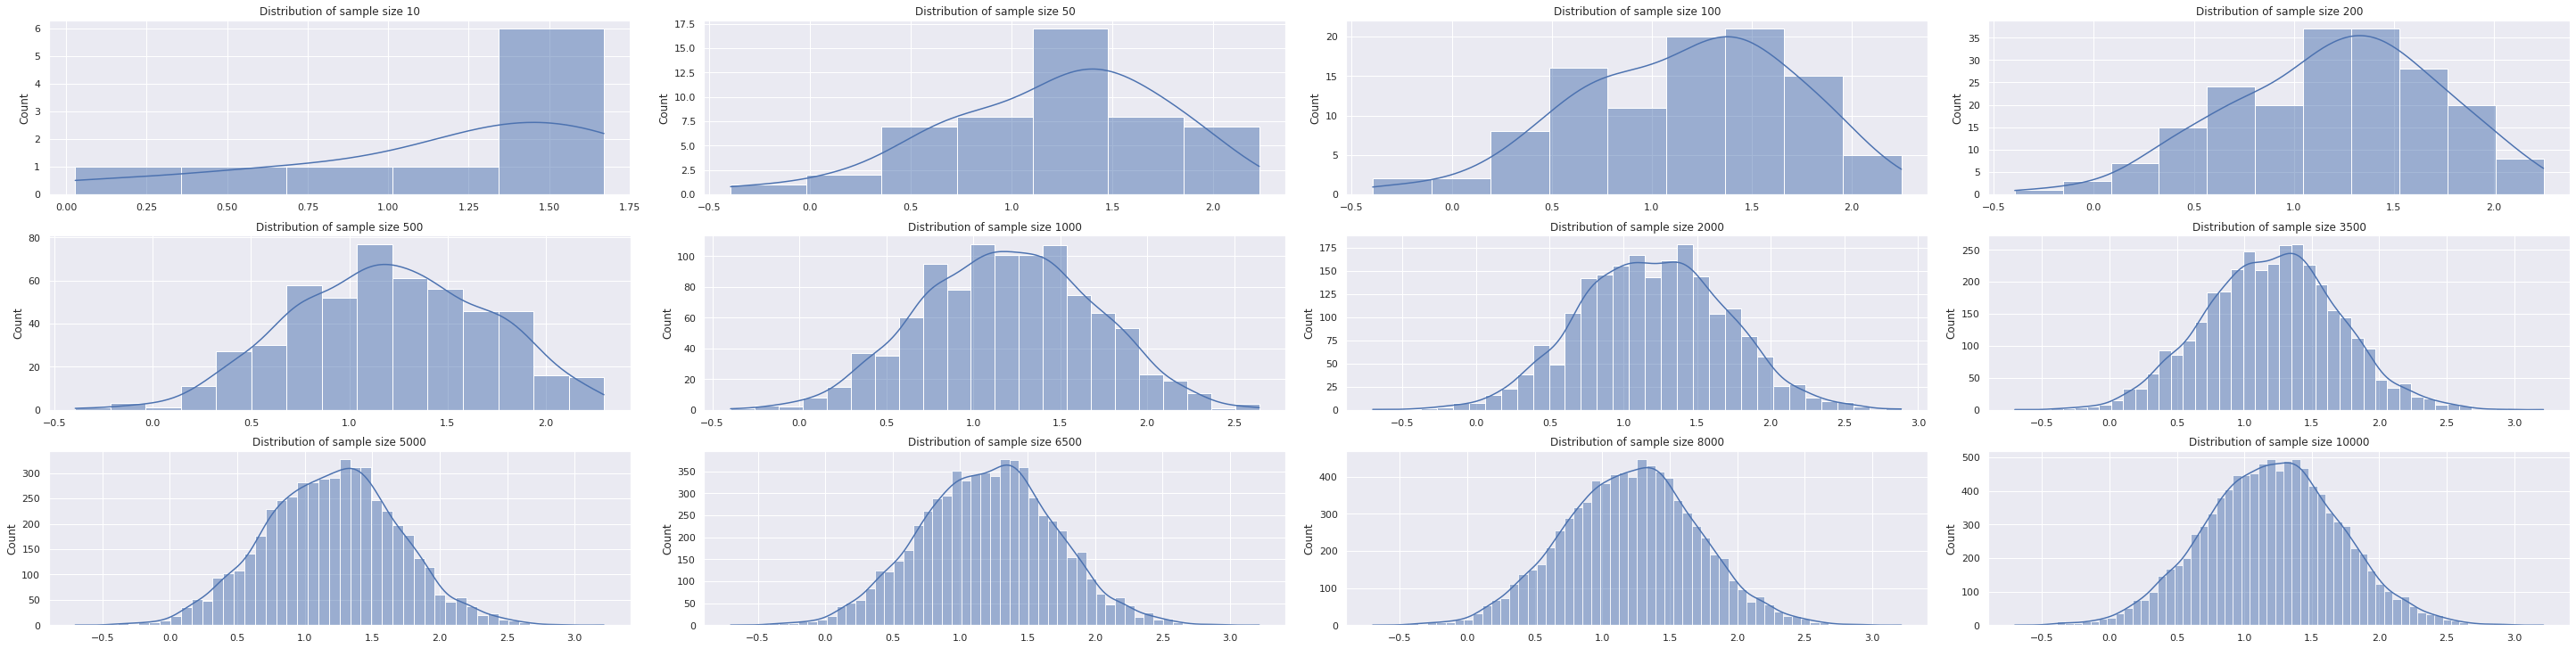

In [183]:
def histplot_sample_size(figsize, sample_size_lst, sample_dict):
    ss_list = dcp(sample_size_lst)
    fig, ax = plt.subplots(nrows=3,ncols=4, figsize=figsize, constrained_layout=True)
    for i in range(3):
        for j in range(4):
            for ss in ss_list:
                sns.histplot(data=sample_dict[ss], palette="Set2", kde=True, ax=ax[i][j]).set(title=f'Distribution of sample size {ss}')
                ss_list.remove(ss)
                break

histplot_sample_size((40,10), sample_size_lst, sample_dict)

In [223]:
sample_lst = [10, 100, 1000, 10000]
estim_explainer = {'xbar': 'bootstrapped sample mean', 
                   's-sqd': 'bootstraped sample variance'}

def histplot_estimator(figsize, estimator, estim_explainer, bootstrap_sample_dict, sample_size_lst = sample_lst, bs_reps_lst = reps_lst):
    line_position_lower = []
    line_position_higher = []

    row_num = len(sample_size_lst)
    col_num = len(bs_reps_lst)
    fig, axes = plt.subplots(nrows = row_num, ncols=col_num, figsize=figsize, constrained_layout=True)
    for i, ss in enumerate(sample_size_lst):
        for j, bs in enumerate(bs_reps_lst):
            sns.histplot(data=bootstrap_sample_dict[ss][bs][estimator], palette="Set2", kde=True, ax=axes[i][j], legend = False).set(title=f'Sampling distro of the {estim_explainer[estimator]} with sample size {ss} and bootstrap resampling {bs}')
            line_position_lower.append(np.percentile(bootstrap_sample_dict[ss][bs][estimator],2.5))
            line_position_higher.append(np.percentile(bootstrap_sample_dict[ss][bs][estimator],97.5))

    for ax, pos_lower, pos_higher in zip(fig.axes, line_position_lower, line_position_higher): 
        ax.axvline(pos_lower, color = 'red',linewidth=2)
        ax.axvline(pos_higher,color = 'red',linewidth=2)

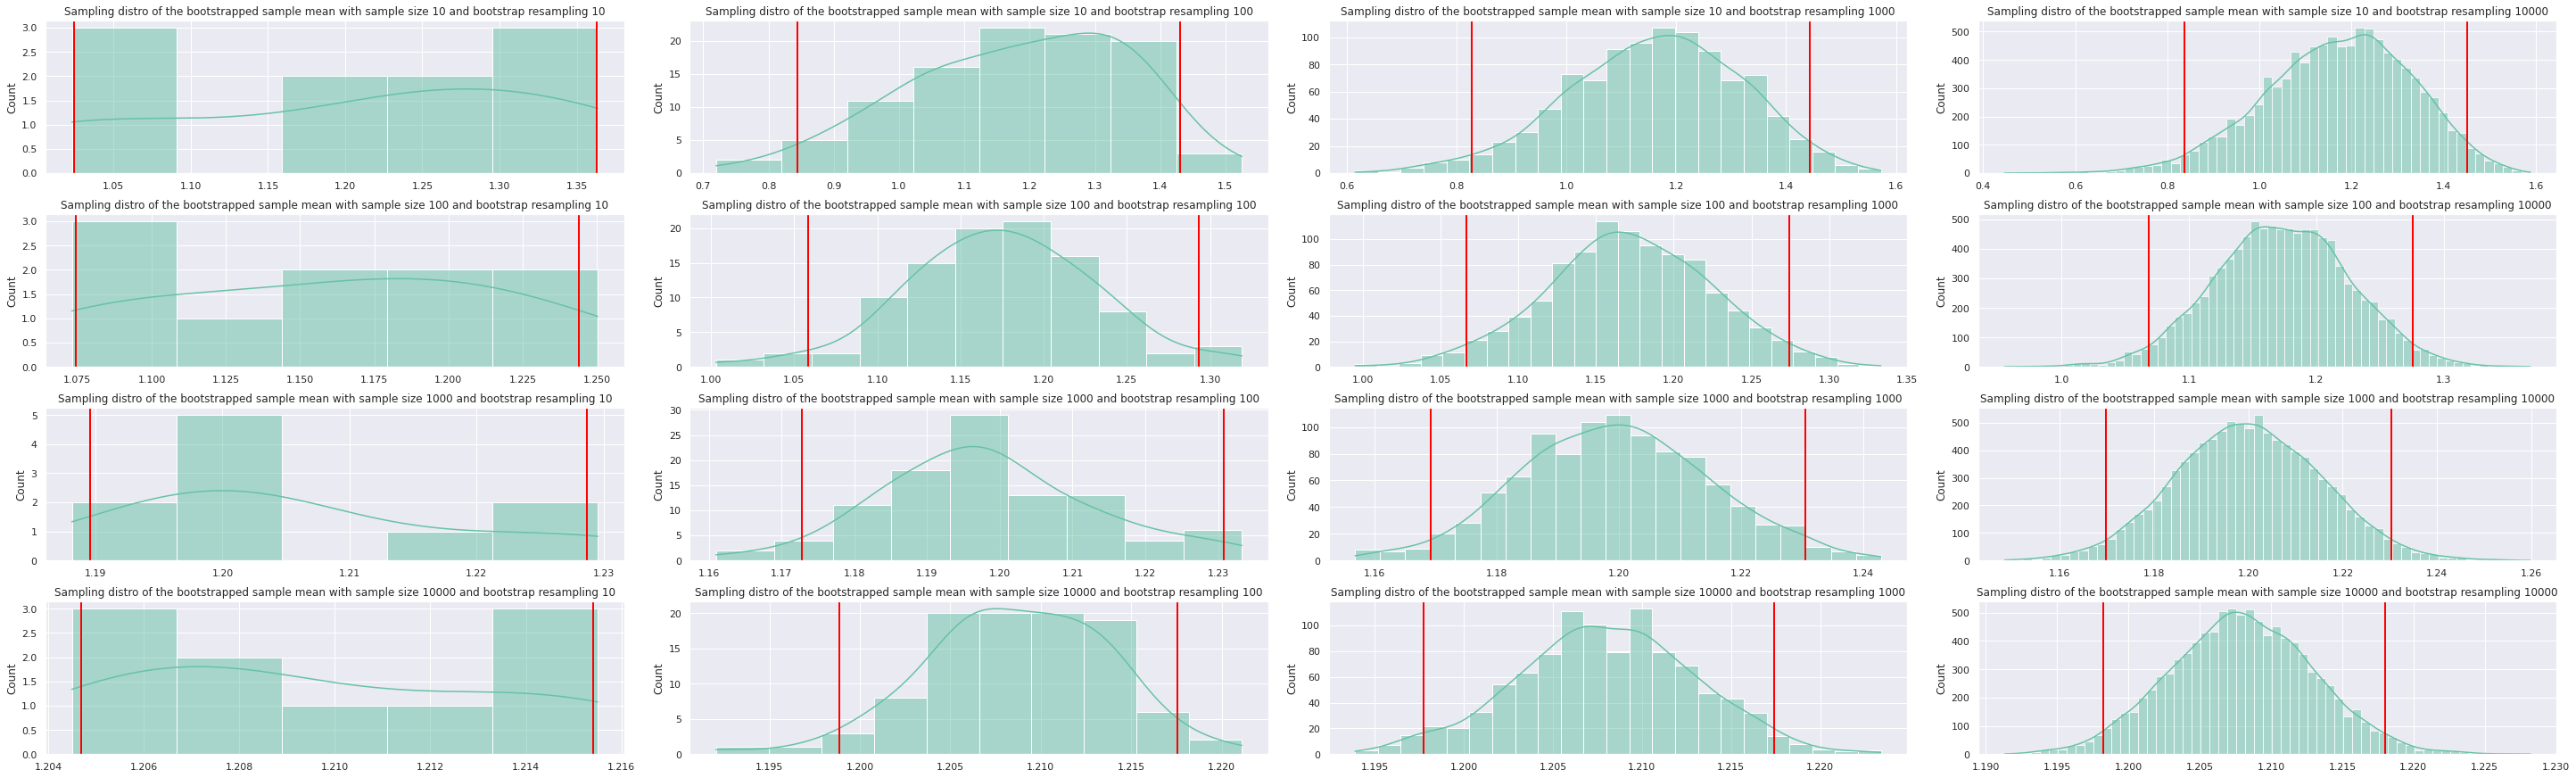

In [224]:
histplot_estimator((40,12), 'xbar', estim_explainer, bootstrap_sample_dict)

In [219]:
print(np.percentile(bootstrap_sample_dict[10000][10000]['xbar'],2.5))
print(np.percentile(bootstrap_sample_dict[10000][10000]['xbar'],97.5))

1.1982417009336717
1.2179894311040675


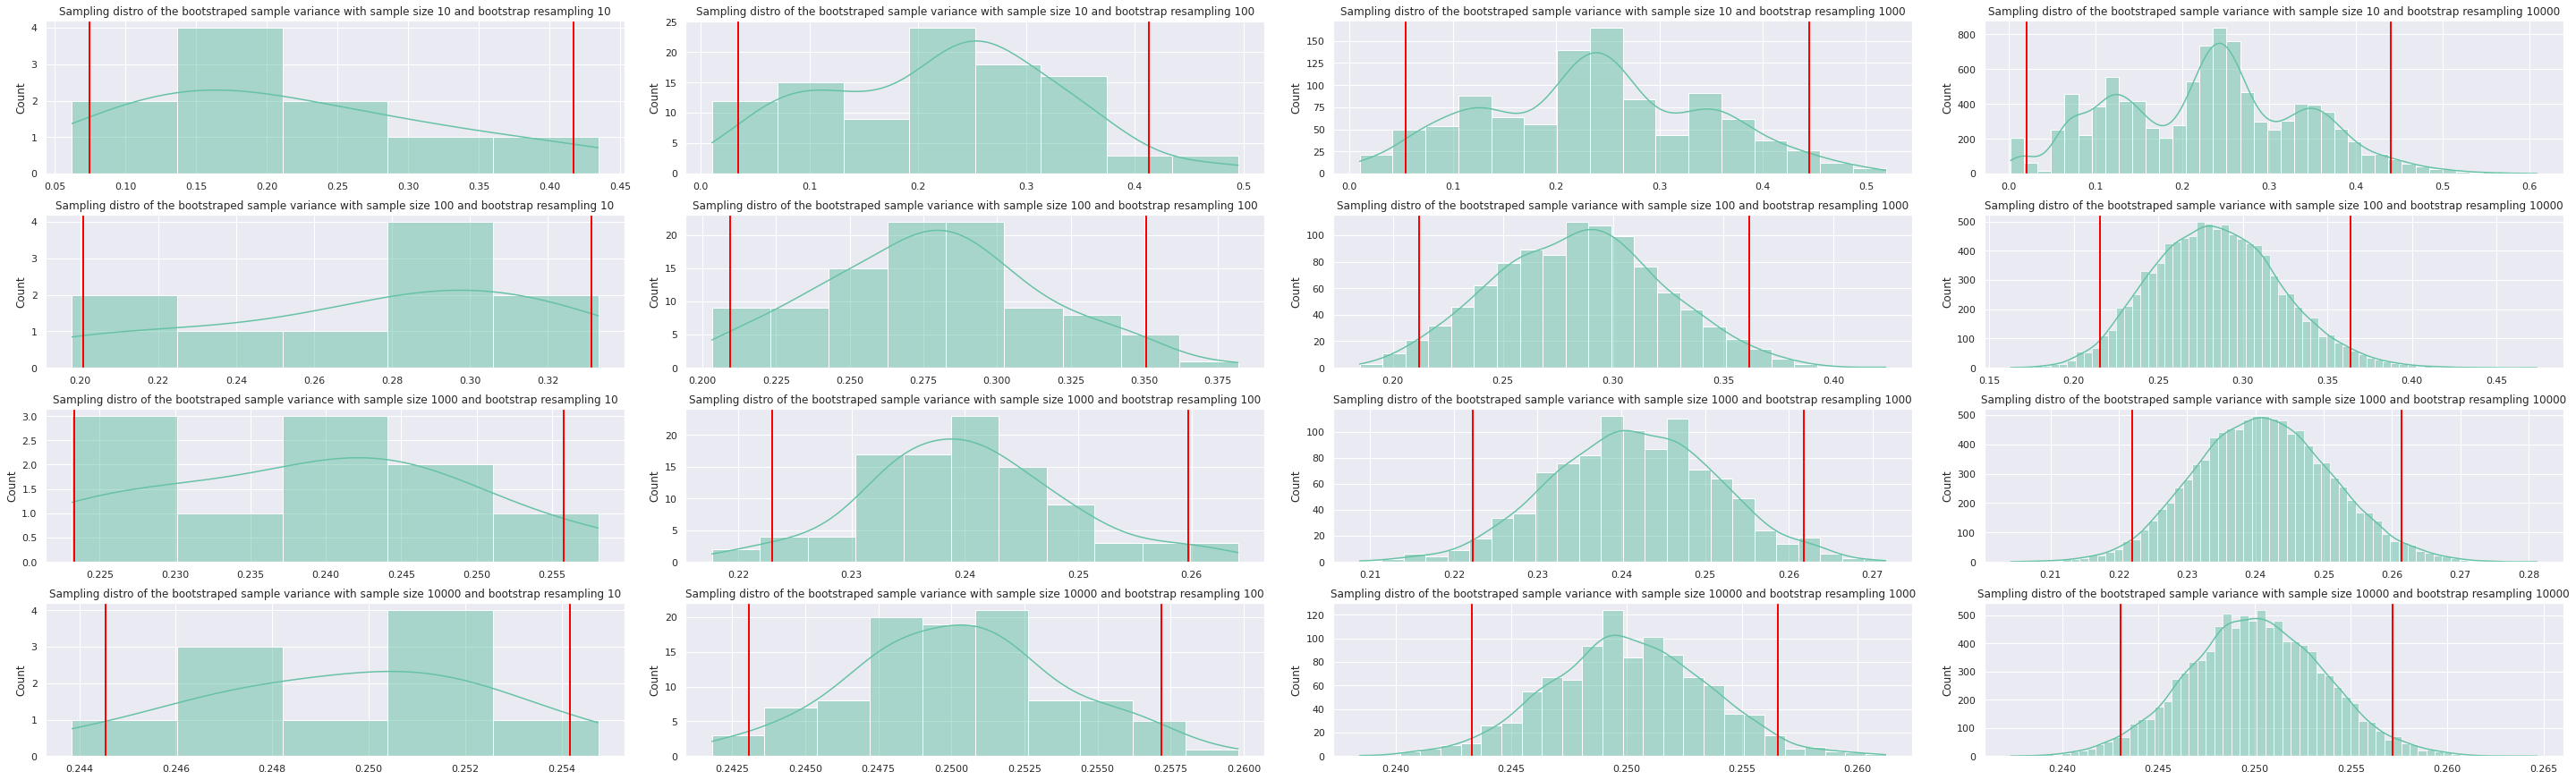

In [220]:
histplot_estimator((40,12), 's-sqd', estim_explainer, bootstrap_sample_dict)

In [189]:
encompassing_df

,Result_Type,Sample_Size,Bs_Resample,Sample_Facts,Estimator,Mean,0.025,0.975,diff_0.95,Bias,Variance,RMSE
0,tr,10,NaN,1.171970,xbar,1.200000,NaN,NaN,NaN,0.000000,0.025000,0.158114
1,tr,10,NaN,0.253883,s-sqd,0.225000,NaN,NaN,NaN,0.025000,0.013889,0.108972
2,trbs,10,NaN,1.171970,xbar,1.171970,NaN,NaN,NaN,0.000000,0.025388,0.159337
3,trbs,10,NaN,0.253883,s-sqd,0.228495,NaN,NaN,NaN,0.025388,0.014324,0.110665
4,bs,10,10.0,1.171970,xbar,1.205034,1.024067,1.363181,0.339114,0.033065,0.016152,0.131320
...,...,...,...,...,...,...,...,...,...,...,...,...
139,bs,10000,100.0,0.250100,s-sqd,0.250230,0.243083,0.257171,0.014088,0.000131,0.000013,0.003651
140,bs,10000,1000.0,1.208015,xbar,1.207993,1.197749,1.217401,0.019651,0.000022,0.000025,0.004990
141,bs,10000,1000.0,0.250100,s-sqd,0.250052,0.243314,0.256542,0.013228,0.000047,0.000012,0.003445
142,bs,10000,10000.0,1.208015,xbar,1.207973,1.198242,1.217989,0.019748,0.000042,0.000026,0.005050


In [190]:
encomp_hier = encompassing_df.set_index(['Sample_Size', 'Bs_Resample', 'Sample_Facts'])

In [191]:
encomp_hier

Result_Type Estimator  ...  Variance      RMSE
Sample_Size Bs_Resample Sample_Facts                        ...                    
10          NaN         1.171970              tr      xbar  ...  0.025000  0.158114
                        0.253883              tr     s-sqd  ...  0.013889  0.108972
                        1.171970            trbs      xbar  ...  0.025388  0.159337
                        0.253883            trbs     s-sqd  ...  0.014324  0.110665
            10.0        1.171970              bs      xbar  ...  0.016152  0.131320
...                                          ...       ...  ...       ...       ...
10000       100.0       0.250100              bs     s-sqd  ...  0.000013  0.003651
            1000.0      1.208015              bs      xbar  ...  0.000025  0.004990
                        0.250100              bs     s-sqd  ...  0.000012  0.003445
            10000.0     1.208015              bs      xbar  ...  0.000026  0.005050
                        0.250100              bs     s-sqd  ...  0.000013  0.003553

[144 rows x 9 columns]

In [192]:
idx = pd.IndexSlice
encomp_hier.loc[idx[:, 100], :]

Result_Type Estimator  ...  Variance      RMSE
Sample_Size Bs_Resample Sample_Facts                        ...                    
10          100.0       1.171970              bs      xbar  ...  0.027704  0.166840
                        0.253883              bs     s-sqd  ...  0.011480  0.112251
50          100.0       1.209534              bs      xbar  ...  0.006442  0.080735
                        0.305204              bs     s-sqd  ...  0.003779  0.063684
100         100.0       1.172737              bs      xbar  ...  0.003169  0.056335
                        0.287592              bs     s-sqd  ...  0.001389  0.038485
200         100.0       1.208042              bs      xbar  ...  0.001309  0.036904
                        0.270055              bs     s-sqd  ...  0.000648  0.026090
500         100.0       1.207423              bs      xbar  ...  0.000451  0.021543
                        0.239109              bs     s-sqd  ...  0.000175  0.013560
1000        100.0       1.199651              bs      xbar  ...  0.000213  0.014667
                        0.241453              bs     s-sqd  ...  0.000078  0.008955
2000        100.0       1.196920              bs      xbar  ...  0.000114  0.010738
                        0.248963              bs     s-sqd  ...  0.000058  0.007656
3500        100.0       1.201880              bs      xbar  ...  0.000070  0.008383
                        0.245782              bs     s-sqd  ...  0.000040  0.006377
5000        100.0       1.199423              bs      xbar  ...  0.000057  0.007545
                        0.244304              bs     s-sqd  ...  0.000017  0.004117
6500        100.0       1.203425              bs      xbar  ...  0.000044  0.006626
                        0.247292              bs     s-sqd  ...  0.000015  0.003897
8000        100.0       1.206864              bs      xbar  ...  0.000036  0.005960
                        0.248533              bs     s-sqd  ...  0.000015  0.003837
10000       100.0       1.208015              bs      xbar  ...  0.000025  0.005067
                        0.250100              bs     s-sqd  ...  0.000013  0.003651

[24 rows x 9 columns]

In [193]:
encomp_hier.loc[[10000]]

Result_Type Estimator  ...  Variance      RMSE
Sample_Size Bs_Resample Sample_Facts                        ...                    
10000       NaN         1.208015              tr      xbar  ...  0.000025  0.005000
                        0.250100              tr     s-sqd  ...  0.000013  0.003535
                        1.208015            trbs      xbar  ...  0.000025  0.005001
                        0.250100            trbs     s-sqd  ...  0.000013  0.003537
            10.0        1.208015              bs      xbar  ...  0.000015  0.004189
                        0.250100              bs     s-sqd  ...  0.000009  0.003057
            100.0       1.208015              bs      xbar  ...  0.000025  0.005067
                        0.250100              bs     s-sqd  ...  0.000013  0.003651
            1000.0      1.208015              bs      xbar  ...  0.000025  0.004990
                        0.250100              bs     s-sqd  ...  0.000012  0.003445
            10000.0     1.208015              bs      xbar  ...  0.000026  0.005050
                        0.250100              bs     s-sqd  ...  0.000013  0.003553

[12 rows x 9 columns]

In [229]:
xbar_samples = encomp_hier[(encomp_hier['Result_Type'] == 'bs') & (encomp_hier['Estimator'] == 'xbar')]
s2_samples =  encomp_hier[(encomp_hier['Result_Type'] == 'bs') & (encomp_hier['Estimator'] == 's-sqd')]
all_estim_samples = encomp_hier[(encomp_hier['Result_Type'] == 'bs')]

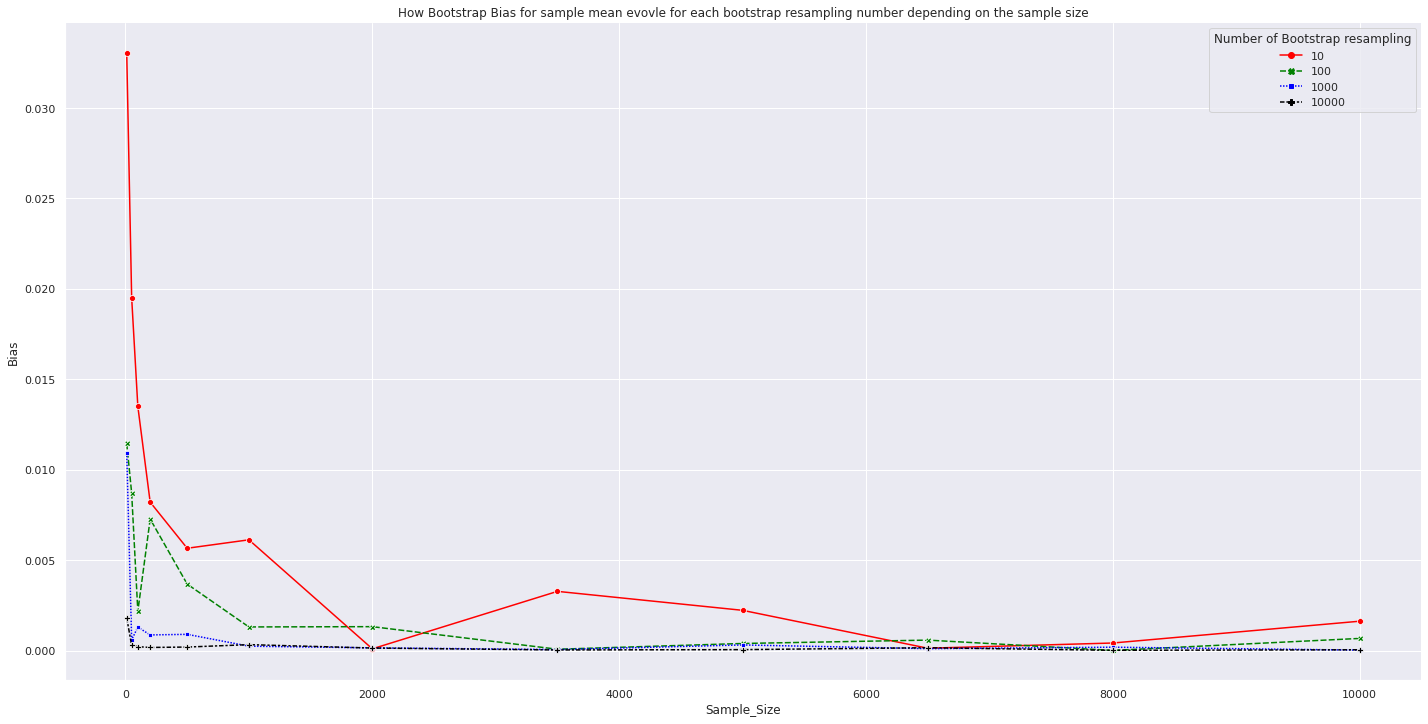

In [196]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Bs_Resample', style = 'Bs_Resample', 
            palette = ['red','green','blue','black' ],  kind="line",  facet_kws={'legend_out': False}, 
            data=xbar_samples, markers=True, height = 10, aspect = 2).set(title = 'How Bootstrap Bias for sample mean evovle for each bootstrap resampling number depending on the sample size')

leg = g.axes.flat[0].get_legend()
new_title = 'Number of Bootstrap resampling'
leg.set_title(new_title)
new_labels = ['10', '100', '1000', '10000']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)

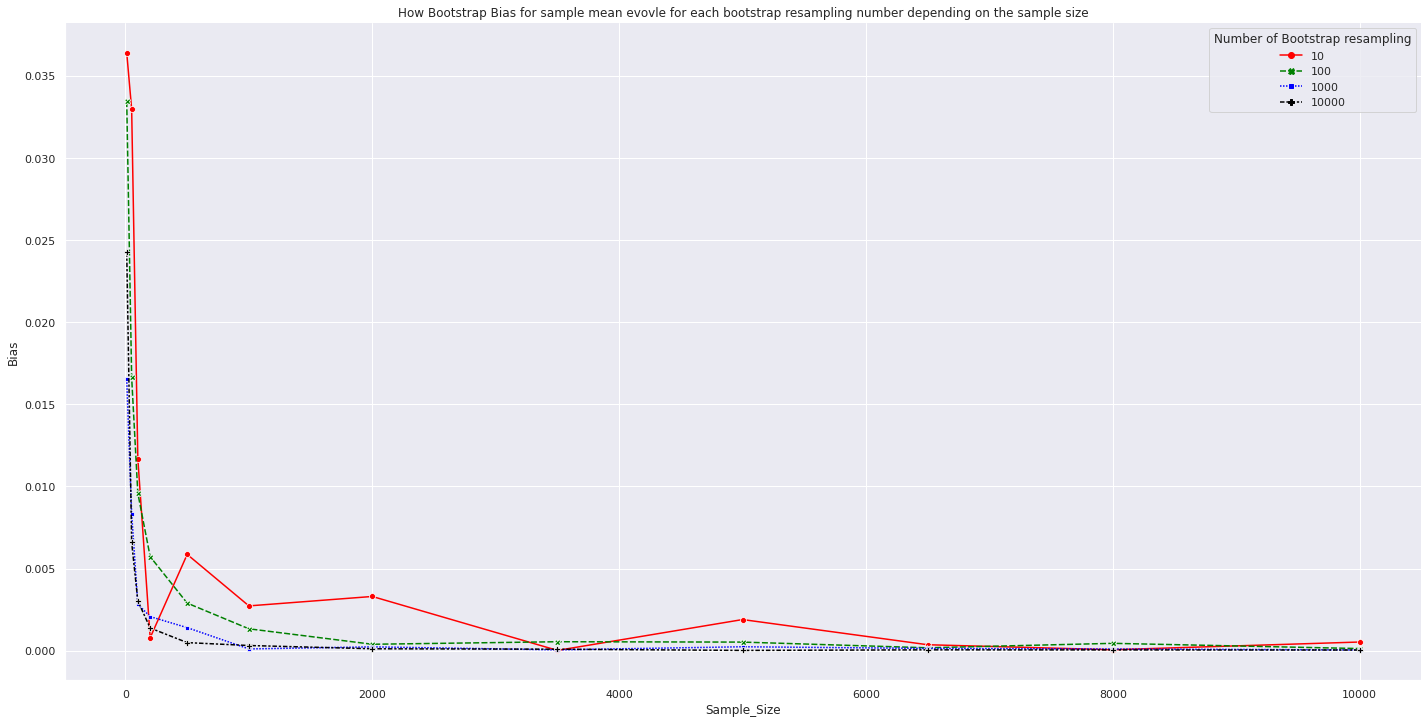

In [197]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Bs_Resample', style = 'Bs_Resample', 
            palette = ['red','green','blue','black' ],  kind="line",  facet_kws={'legend_out': False}, 
            data=s2_samples, markers=True, height = 10, aspect = 2).set(title = 'How Bootstrap Bias for sample mean evovle for each bootstrap resampling number depending on the sample size')

leg = g.axes.flat[0].get_legend()
new_title = 'Number of Bootstrap resampling'
leg.set_title(new_title)
new_labels = ['10', '100', '1000', '10000']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)

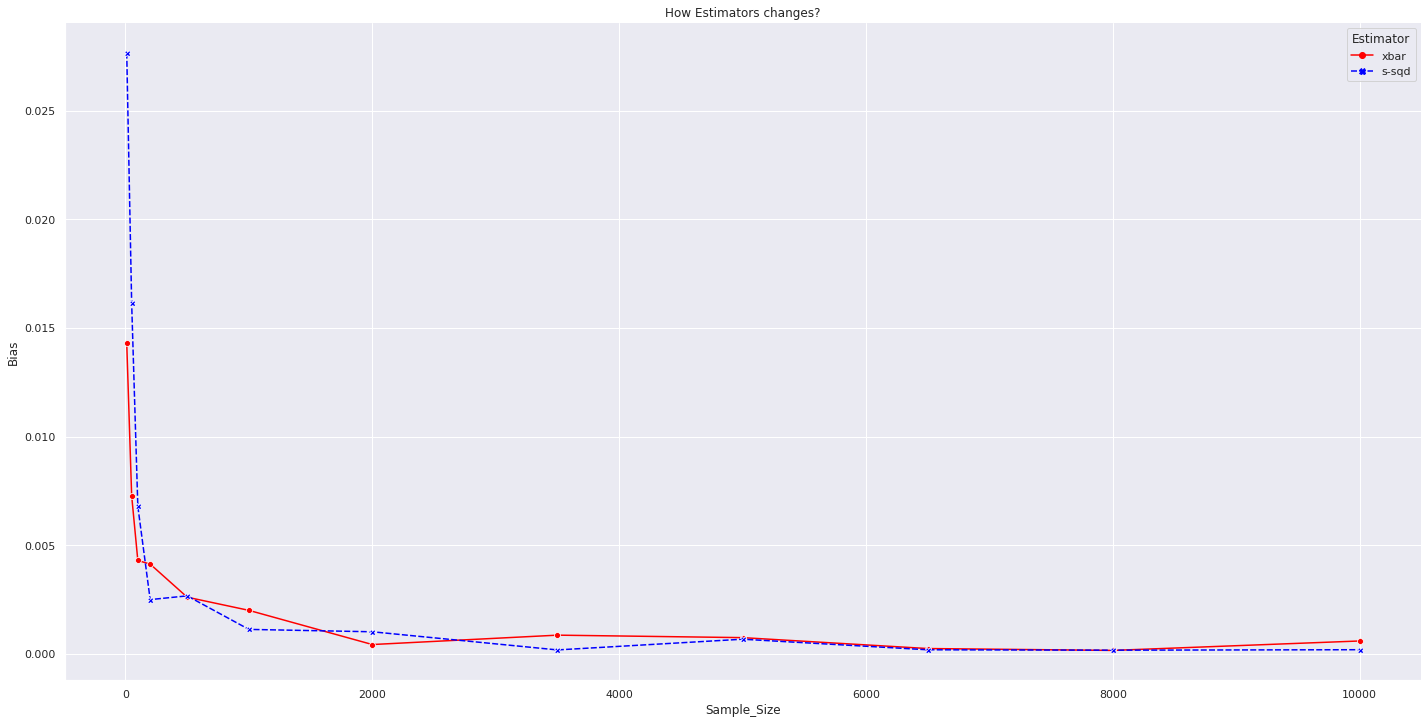

In [234]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Estimator', style = 'Estimator', 
            palette = ['red','blue'],
            kind="line",  facet_kws={'legend_out': False}, 
            data=all_estim_samples, ci = None,
            markers=True, height = 10, aspect = 2).set(title = 'How Estimators changes?')

leg = g.axes.flat[0].get_legend()
new_title = 'Estimator'
leg.set_title(new_title)
new_labels = list(bs_df['Estimator'])
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)